In [1]:
import seaborn as sns
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import gc

# 
import datetime

# Jupyter stuff
from IPython.display import IFrame
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
display(HTML("<style>.text_cell_render p, .text_cell_render li { font-size: 13pt !important; }</style>"))
display(HTML("<style>.text_cell_render li { margin: 0 0 10px 0; }</style>"))

In [2]:
# Se importa el dataset
df = pd.read_csv("./datasets/mediciones-netatmo-renam.csv") 

In [3]:
display(df.head(5))
print(df.shape)
print("Mostrando los nulos")
display(df.isnull().sum())

,id,user_id,dispositivo_id,sector,temperatura,humedad,co2,ruido,measured_at,local_measured_at,js_measured_at,created_at,updated_at,vivienda_id
0,523815,127.0,2.0,0,16.5,77.0,1080.0,37.0,1494644400,2017-05-13 00:00:00,1494644400000,1494648008,1494648008,6
1,523816,127.0,2.0,0,16.4,77.0,1074.0,37.0,1494646200,2017-05-13 00:30:00,1494646200000,1494648008,1494648008,6
2,523817,113.0,3.0,0,15.7,73.0,891.0,38.0,1494644400,2017-05-13 00:00:00,1494644400000,1494648012,1494648012,9
3,523818,113.0,3.0,0,15.6,73.0,894.0,37.0,1494646200,2017-05-13 00:30:00,1494646200000,1494648012,1494648012,9
4,523819,109.0,4.0,0,21.0,75.0,3991.0,59.0,1494644400,2017-05-13 00:00:00,1494644400000,1494648016,1494648016,11


(10169108, 14)
Mostrando los nulos


id                         0
user_id               299473
dispositivo_id        156446
sector                     0
temperatura              210
humedad                  210
co2                  4726543
ruido                4725843
measured_at                0
local_measured_at          0
js_measured_at             0
created_at                 0
updated_at                 0
vivienda_id                0
dtype: int64

Al ver el dataset se aprecia que hay 10169108 registros con 14 columnas cada uno. Resulta que la caracteristica sector indica 0 si es que la medicion es dentro de la casa o 1 si es que es fuera de ésta, para usos de esta memoria se determina que las mediciones dentro de la casa y fuera de esta deben de vivir en el mismo registro por lo que se carga el csv en una base de datos (postgres) y se decide realizar dicha unificación, así es como se obtiene el nuevo dataset *'mediciones_netatmo_unificadas.csv'*

In [4]:
try:
    del df
except:
    print("No hay df definido :(")
gc.collect()

df = pd.read_csv("./datasets/mediciones_unificadas.csv") 

In [5]:
display(df.head(5))
display(df.describe())
display(df.isnull().sum())
print(df.shape)
print("Viviendas distintas:",len(df.vivienda_id.unique()))

,id,dispositivo_id,vivienda_id,temperatura_interior,humedad_interior,co2,ruido,temperatura_exterior,humedad_exterior,measured_at,date_measured_at
0,1,NaN,3,26.3,48,NaN,NaN,27.5,35,1448569800,2015-11-26 17:30:00
1,2,NaN,3,25.2,47,42.0,66.0,25.4,35,1448571600,2015-11-26 18:00:00
2,3,NaN,3,23.9,45,130.0,59.0,23.4,38,1448573400,2015-11-26 18:30:00
3,4,NaN,3,23.3,46,278.0,44.0,22.4,38,1448575200,2015-11-26 19:00:00
4,5,NaN,3,24.0,46,399.0,44.0,21.5,39,1448577000,2015-11-26 19:30:00


,id,dispositivo_id,vivienda_id,temperatura_interior,humedad_interior,co2,ruido,temperatura_exterior,humedad_exterior,measured_at
count,4.731498e+06,4.653350e+06,4.731498e+06,4.731498e+06,4.731498e+06,4.731333e+06,4.731352e+06,4.731498e+06,4.731498e+06,4.731498e+06
mean,2.365750e+06,1.497018e+02,1.468023e+02,1.983571e+01,5.841729e+01,6.553012e+02,4.434105e+01,1.660592e+01,6.643283e+01,1.517827e+09
std,1.365866e+06,8.465548e+01,8.426349e+01,4.103601e+00,1.130619e+01,6.458876e+02,8.948838e+00,6.370523e+00,1.518488e+01,1.865352e+07
min,1.000000e+00,1.000000e+00,2.000000e+00,2.300000e+00,8.000000e+00,0.000000e+00,3.300000e+01,-1.580000e+01,1.300000e+01,1.448570e+09
25%,1.182875e+06,7.900000e+01,7.600000e+01,1.700000e+01,5.100000e+01,4.110000e+02,3.700000e+01,1.220000e+01,5.600000e+01,1.504723e+09
50%,2.365750e+06,1.480000e+02,1.420000e+02,1.980000e+01,5.900000e+01,5.170000e+02,4.200000e+01,1.610000e+01,6.800000e+01,1.517013e+09
75%,3.548624e+06,2.150000e+02,2.140000e+02,2.280000e+01,6.600000e+01,7.560000e+02,5.000000e+01,2.060000e+01,7.800000e+01,1.531822e+09
max,4.731498e+06,3.100000e+02,3.070000e+02,5.800000e+01,1.000000e+02,5.000000e+03,9.500000e+01,5.480000e+01,1.000000e+02,1.554253e+09


id                          0
dispositivo_id          78148
vivienda_id                 0
temperatura_interior        0
humedad_interior            0
co2                       165
ruido                     146
temperatura_exterior        0
humedad_exterior            0
measured_at                 0
date_measured_at            0
dtype: int64

(4731498, 11)
Viviendas distintas: 303


Ahora al ver el nuevo dataset unificado se aprecia que hay 4731498 registros, estos de un total de 303 viviendas distintas. Se aprecia que hay una gran cantidad de registros con dispositivo_id nulos, pero esto no es relevante ya que no es una variable a utilizar en el análisis. Hay unos pocos registros con nulos en variables revelantes como co2 y ruido (todo al interior de la casa)

In [6]:
# Código que importa el csv a postgres
import psycopg2

def export_to_db():
    try:
        connection = psycopg2.connect(user = "postgres",
                                      password = "abc123",
                                      host = "127.0.0.1",
                                      port = "5432",
                                      database = "memoria")
        cursor = connection.cursor()

        insert_rows_format = '''
        insert into mediciones_netatmo
        (dispositivo_id, vivienda_id, sector, temperatura, humedad, co2, ruido, measured_at, date_measured_at)
        values ({}, {}, {}, {}, {}, {}, {}, {}, '{}'),
        '''
        row_format = "({}, {}, {}, {}, {}, {}, {}, {}, '{}')"
        i = 0
        for row in df.itertuples(index=True, name='Pandas'):
            # print getattr(row, "c1"), getattr(row, "c2")

            sector = False

            dispositivo_id = getattr(row, 'dispositivo_id')
            vivienda_id = getattr(row, 'vivienda_id')

            if getattr(row, 'sector') == 1:
                sector = True

            temperatura = getattr(row, 'temperatura')
            humedad = getattr(row, 'humedad')
            co2 = getattr(row, 'co2')
            ruido = getattr(row, 'ruido')
            measured_at = getattr(row, 'measured_at')
            date_measured_at = getattr(row, 'local_measured_at')

            if i == 0:
                SQL = insert_rows_format.format(dispositivo_id, vivienda_id, sector, temperatura, humedad, co2, ruido, measured_at, date_measured_at)
            elif i < 5000:
                SQL+= row_format.format(dispositivo_id, vivienda_id, sector, temperatura, humedad, co2, ruido, measured_at, date_measured_at)+","
            else:
                SQL+= row_format.format(dispositivo_id, vivienda_id, sector, temperatura, humedad, co2, ruido, measured_at, date_measured_at)
                SQL = SQL.replace("nan", "NULL")
                cursor.execute(SQL)
                connection.commit()
                SQL = ""
                i = -1
            i+=1

        if SQL != "":
            SQL+= row_format.format(dispositivo_id, vivienda_id, sector, temperatura, humedad, co2, ruido, measured_at, date_measured_at)
            SQL = SQL.replace("nan", "NULL")
            cursor.execute(SQL)
            connection.commit()

    except (Exception, psycopg2.Error) as error :
        print ("Error while connecting to PostgreSQL", error)
    finally:
        #closing database connection.
            if(connection):
                cursor.close()
                connection.close()
                print("PostgreSQL connection is closed")
                
# export_to_db()

Se va a proceder a sacar una muestra del orden del 10% de los datos para poder graficar las variables

In [7]:
df_sample = df.sample(frac=0.03, replace=False, random_state=23)

In [8]:
def temporada(a):
    fecha = datetime.datetime.strptime(a, '%Y-%m-%d %H:%M:%S')
    year = fecha.year
    otoño = (datetime.datetime(year, 3, 20), datetime.datetime(year, 6, 21))
    invierno = (datetime.datetime(year, 6, 21), datetime.datetime(year, 9, 23))
    primavera = (datetime.datetime(year, 9, 23), datetime.datetime(year, 12, 21))
    
    if otoño[0] <= fecha < otoño[1]:
        return "otoño"
    elif invierno[0] <= fecha < invierno[1]:
        return "invierno"
    elif primavera[0] <= fecha < primavera[1]:
        return "primavera"
    else:
        return "verano"
    
df_sample['epoca'] = np.vectorize(temporada)(df_sample['date_measured_at'])

In [9]:
print("Mostrando la forma de la muestra")
print(df_sample.shape)

Mostrando la forma de la muestra
(141945, 12)


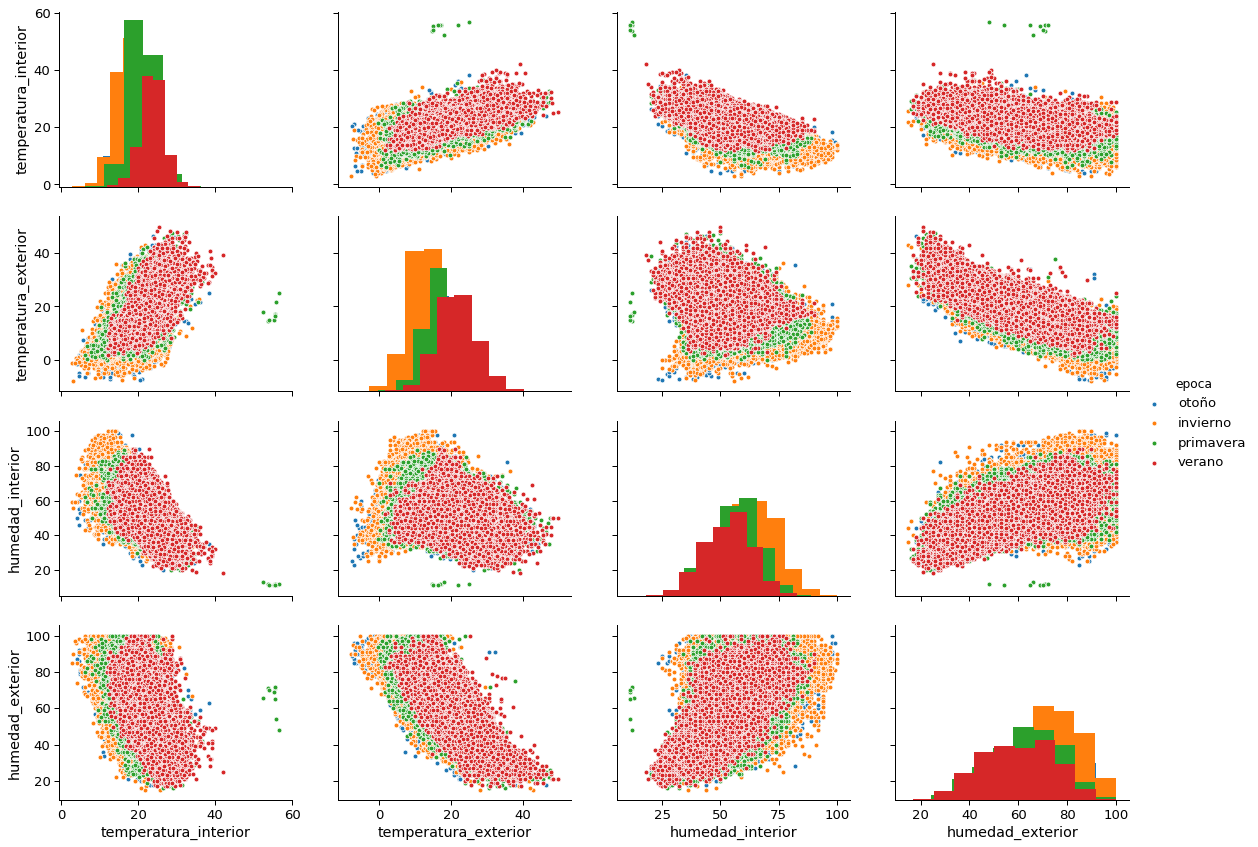

In [10]:
# VARIABLES = ['temperatura_interior', 'temperatura_exterior', 'humedad_interior', 'humedad_exterior', 'co2', 'ruido']
VARIABLES = ['temperatura_interior', 'temperatura_exterior', 'humedad_interior', 'humedad_exterior']
sns.set_context("paper", font_scale=1.5) 
sns.pairplot(df_sample, vars=VARIABLES, height=3, dropna=True, hue="epoca", diag_kind="hist", aspect=4/3)

Al ver el gráfico del cruce de todas las variables se aprecia lo siguiente
- **Temperatura interior:** Se relaciona con la temperatura exterior y la humedad interior
- **Temperatura exterior:** Se relaciona con humedad exterior y temperatura interior
- **Humedad interior:** Se relaciona con temperatura interior
- **Humedad exterior:** Se relaciona con temperatura interior
- **Humedad interior:** Se relaciona con temperatura exterior

Al ver el co2 y el ruido no se aprecia alguna relacion aparente.


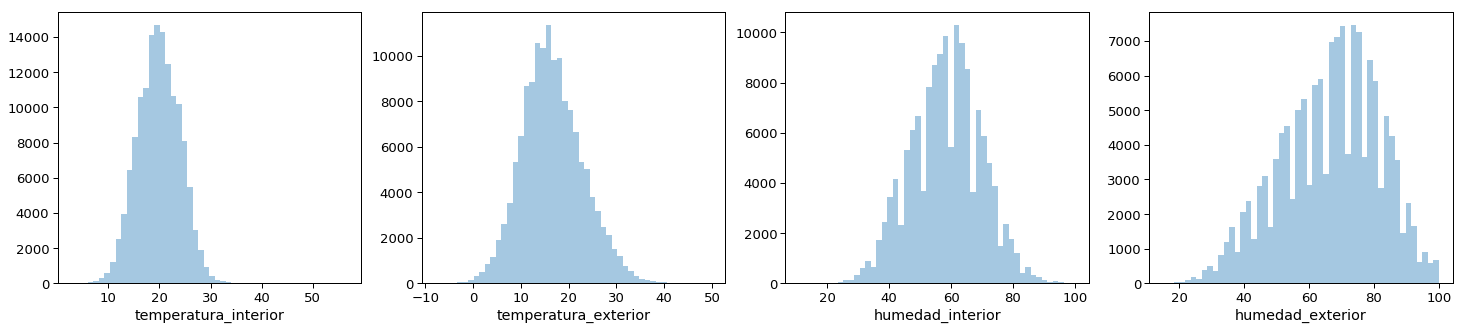

In [59]:
fig, ax = plt.subplots(1, 4, figsize=(25,5))

for i in range(len(VARIABLES)):
    sns.distplot(df_sample[VARIABLES[i]].dropna(), hist=True, kde=False, ax=ax[i])
    
plt.show()

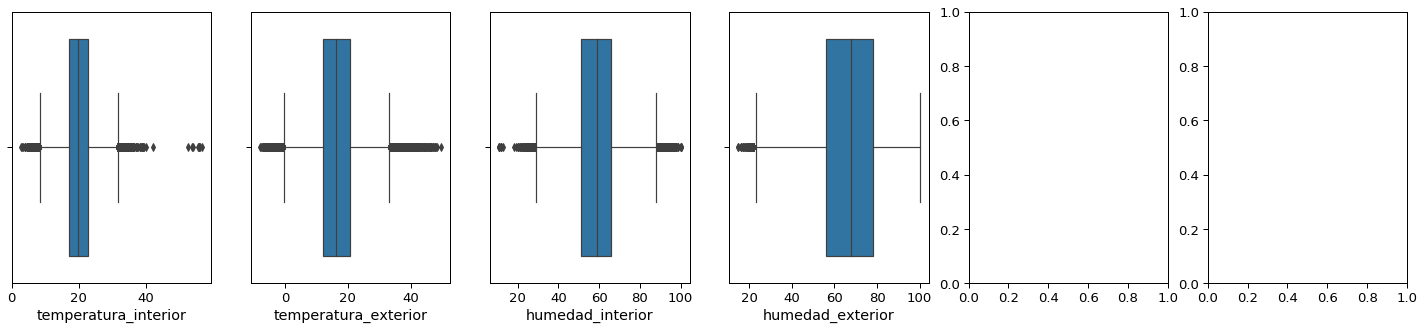

In [11]:
fig, ax = plt.subplots(1, 6, figsize=(25,5))

for i in range(len(VARIABLES)):
    sns.boxplot(x=df_sample[VARIABLES[i]].dropna(), ax=ax[i], orient="h")

## Deteccción de outliers multi-variado

https://www.analyticsvidhya.com/blog/2019/02/outlier-detection-python-pyod/

In [35]:
from pyod.models.knn import KNN
from pyod.models.iforest import IForest
display(df_sample.head())
print(df_sample.shape)

,id,dispositivo_id,vivienda_id,temperatura_interior,humedad_interior,co2,ruido,temperatura_exterior,humedad_exterior,measured_at,date_measured_at,epoca
4690733,4690734,142.0,145,23.4,30,440.0,46.0,20.8,42,1553140800,2019-03-21 01:00:00,otoño
3923140,3923141,302.0,290,18.2,53,333.0,39.0,9.3,90,1537353000,2018-09-19 07:30:00,invierno
2893543,2893544,260.0,255,19.7,64,1677.0,67.0,16.1,60,1522971000,2018-04-05 20:30:00,otoño
277029,277030,11.0,24,17.1,66,901.0,50.0,12.4,72,1494048600,2017-05-06 02:30:00,otoño
3074102,3074103,176.0,180,18.3,64,581.0,36.0,12.5,87,1525325400,2018-05-03 02:30:00,otoño


(141945, 12)


In [37]:
# Se trasnforma la data para que quede toda junta
x1 = df_sample['temperatura_interior'].values.reshape(-1,1)
x2 = df_sample['humedad_interior'].values.reshape(-1,1)
x3 = df_sample['temperatura_exterior'].values.reshape(-1,1)
x4 = df_sample['humedad_exterior'].values.reshape(-1,1)

X = np.concatenate((x1,x2, x3, x4),axis=1)

In [39]:
def getOutliers(model, X):
    # Anormality score
    # scores_pred = model.decision_function(X) * -1
    y_pred = model_B.predict(X)
    
    # Muestra por pantalla el número de outliers
    n_inliers = len(y_pred) - np.count_nonzero(y_pred)
    n_outliers = np.count_nonzero(y_pred == 1)
    print('OUTLIERS : ', n_outliers,'INLIERS : ',n_inliers)
    return y_pred

In [41]:
# Porcentage de outliers en la muestra
OUTLIERS_FRACTION = 0.05

model = IForest(contamination=OUTLIERS_FRACTION, random_state= 22, behaviour='new')
model.fit(X)

outlierIndex = getOutliers(model, X)

OUTLIERS :  7098 INLIERS :  134847


## Rellenado de data faltante

In [106]:
HASH_OF_TIME_SERIES = {}

TARGET_DF = df

# TODO: Ver que está pasando entre lo que dice el segundo y la fecha
TARGET_DF.date_measured_at = pd.to_datetime(TARGET_DF.measured_at, unit='s')
display(df_sample.head())

for i, g in TARGET_DF.groupby('vivienda_id'):
    HASH_OF_TIME_SERIES[i] = g.set_index('date_measured_at')
    
display(HASH_OF_TIME_SERIES[2].head())

,id,dispositivo_id,vivienda_id,temperatura_interior,humedad_interior,co2,ruido,temperatura_exterior,humedad_exterior,measured_at,date_measured_at,epoca
4690733,4690734,142.0,145,23.4,30,440.0,46.0,20.8,42,1553140800,2019-03-21 04:00:00,otoño
3923140,3923141,302.0,290,18.2,53,333.0,39.0,9.3,90,1537353000,2018-09-19 10:30:00,invierno
2893543,2893544,260.0,255,19.7,64,1677.0,67.0,16.1,60,1522971000,2018-04-05 23:30:00,otoño
277029,277030,11.0,24,17.1,66,901.0,50.0,12.4,72,1494048600,2017-05-06 05:30:00,otoño
3074102,3074103,176.0,180,18.3,64,581.0,36.0,12.5,87,1525325400,2018-05-03 05:30:00,otoño


,id,dispositivo_id,vivienda_id,temperatura_interior,humedad_interior,co2,ruido,temperatura_exterior,humedad_exterior,measured_at
date_measured_at,,,,,,,,,,
2016-01-01 03:00:00,3084,1.0,2,25.0,46,438.0,66.0,21.5,48,1451617200
2016-01-01 03:30:00,3089,1.0,2,24.9,45,441.0,69.0,21.5,47,1451619000
2016-01-01 04:00:00,3094,1.0,2,24.8,45,473.0,60.0,21.7,46,1451620800
2016-01-01 04:30:00,3099,1.0,2,24.5,45,445.0,59.0,21.7,46,1451622600
2016-01-01 05:00:00,3104,1.0,2,24.2,45,429.0,59.0,21.4,46,1451624400


In [131]:
cont = 0
for i in HASH_OF_TIME_SERIES.keys():
    temp = HASH_OF_TIME_SERIES[i].resample('30min').mean()
    a = (temp.isna().sum()/len(temp) * 100).temperatura_interior
    print("Casa {}, Porcentage de null: {}%".format(i,a))
    if a >= 50:
        cont+=1
        
print("Casas 'malas':",cont)
print("Total casas:", len(HASH_OF_TIME_SERIES.keys()))

Casa 2, Porcentage de null: 19.79309696228722%
Casa 3, Porcentage de null: 1.299164822614034%
Casa 4, Porcentage de null: 3.69462655474542%
Casa 5, Porcentage de null: 1.5388257575757576%
Casa 6, Porcentage de null: 49.6072420729955%
Casa 8, Porcentage de null: 23.844401041666664%
Casa 9, Porcentage de null: 11.313974141848073%
Casa 10, Porcentage de null: 12.272828014184398%
Casa 11, Porcentage de null: 7.455128397207324%
Casa 12, Porcentage de null: 2.6468910439247004%
Casa 13, Porcentage de null: 1.0796377989319712%
Casa 14, Porcentage de null: 0.06775067750677506%
Casa 15, Porcentage de null: 36.740843764487714%
Casa 16, Porcentage de null: 76.18020608674814%
Casa 17, Porcentage de null: 21.25871908687381%
Casa 18, Porcentage de null: 8.599561029142787%
Casa 19, Porcentage de null: 1.0313926618948317%
Casa 20, Porcentage de null: 89.91426922759871%
Casa 21, Porcentage de null: 0.0%
Casa 22, Porcentage de null: 1.5510204081632653%
Casa 23, Porcentage de null: 15.869082208169544%
Cas

Casa 174, Porcentage de null: 33.40503561605191%
Casa 175, Porcentage de null: 40.15203085999546%
Casa 176, Porcentage de null: 54.166483250429195%
Casa 177, Porcentage de null: 75.16629711751663%
Casa 178, Porcentage de null: 0.09050518347869015%
Casa 179, Porcentage de null: 19.129811763173322%
Casa 180, Porcentage de null: 12.182040585892167%
Casa 181, Porcentage de null: 1.5520707679935666%
Casa 182, Porcentage de null: 14.835142822803574%
Casa 183, Porcentage de null: 11.500100948919846%
Casa 184, Porcentage de null: 38.42530071291731%
Casa 185, Porcentage de null: 7.748115577889447%
Casa 186, Porcentage de null: 13.532394366197185%
Casa 187, Porcentage de null: 7.5011779487984915%
Casa 188, Porcentage de null: 34.732583133139464%
Casa 189, Porcentage de null: 9.304237044343074%
Casa 190, Porcentage de null: 19.770540340488527%
Casa 191, Porcentage de null: 0.5477392331650736%
Casa 192, Porcentage de null: 57.61962203457982%
Casa 193, Porcentage de null: 29.055499622451546%
Casa 1

In [124]:
import math

HOUSE_IN_STUDY = 2#16

temp = HASH_OF_TIME_SERIES[HOUSE_IN_STUDY].resample('30min').mean()
lakes = []
lake=[]
in_lake = False
for index, row in temp.iterrows():
    
    temperatura = getattr(row, 'temperatura_interior')
    fecha = index
    
    # Caso en que se inicia una laguna
    if math.isnan(temperatura) and not in_lake:
        in_lake = True
        lake.append(fecha)
    elif in_lake and not math.isnan(temperatura):
        in_lake = False
        lake.append(fecha)
        lakes.append(lake)
        lake = list()

In [125]:
for x, y in lakes:
    print(y-x)

0 days 01:00:00
0 days 03:30:00
0 days 02:30:00
0 days 04:30:00
0 days 03:00:00
3 days 00:00:00
32 days 03:00:00
0 days 02:30:00
0 days 01:30:00
6 days 21:00:00
0 days 00:30:00
7 days 22:30:00
0 days 00:30:00
0 days 19:00:00
24 days 16:30:00
2 days 10:30:00
22 days 08:30:00
0 days 00:30:00
0 days 01:30:00
0 days 04:00:00
0 days 00:30:00
0 days 00:30:00
13 days 02:00:00
0 days 05:00:00
0 days 16:00:00
82 days 17:00:00
6 days 09:30:00
0 days 00:30:00
0 days 07:30:00
0 days 05:00:00
0 days 00:30:00
9 days 08:00:00
0 days 01:00:00
4 days 22:00:00


In [69]:
HASH_OF_TIME_SERIES.keys()

dict_keys([2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221

## Caracterización casas

In [3]:
df_casas = pd.read_csv("./datasets/RENAM_encuesta_inicial.csv")

In [4]:
print(df_casas.shape)
df_casas.head(3)

(293, 82)


,ID,Fecha de Instalación del sensor,Región,Ciudad,Comuna,N° de personas que componen el hogar (incluyendo el encuestado),N° de personas del hogar menores de 14 años,N° de personas del hogar mayores de 14 años y menores de 65 años,N° de personas del hogar mayores de 65 años,Parentesco con jefe(a) de hogar,...,Otro (Cuantas horas),Respecto a la sensación térmica de la vivienda [Otoño],Respecto a la sensación térmica de la vivienda [Invierno],Respecto a la sensación térmica de la vivienda [Primavera],Respecto a la sensación térmica de la vivienda [Verano],¿Qué área(s) de la vivienda es (son) la(s) más confortable(s)?,Lugar de la vivienda,Altura (metros),Lugar de la vivienda.1,Altura (metros).1
0,NA002,3/27/2017,Metropolitana de Santiago,Santiago,Estación Central,2,NaN,2.0,NaN,Jefe (a) de hogar,...,NaN,Temperatura media,Frío,Temperatura media,Temperatura media,"Cocina, Terraza",Living,1.8,Patio trasero,1.8
1,NA003,3/24/2017,Metropolitana de Santiago,Santiago,Providencia,2,2.0,2.0,NaN,Servicio doméstico,...,NaN,Frío,Frío,Caluroso,Caluroso,"Cocina, Comedor, Living",Dormitorio Secundario,1.2,Balcón,2.2
2,NA004,2/7/2017,Metropolitana de Santiago,Santiago,Cerro Navia,5,2.0,3.0,NaN,Hijo(a) de ambos,...,NaN,Frío,Frío,Temperatura media,Temperatura media,"Comedor, Living",Living-comedor,2.0,Patio delantero,2.0


In [7]:
i = 0
for x in df_casas.columns:
    print("{}, {}".format(i, x))
    i+=1

0, ID
1, Fecha de Instalación del sensor
2, Región
3, Ciudad
4, Comuna
5, N° de personas que componen el hogar (incluyendo el encuestado)
6, N° de personas del hogar menores de 14 años
7, N° de personas del hogar mayores de 14 años y menores de 65 años
8, N° de personas del hogar mayores de 65 años
9, Parentesco con jefe(a) de hogar
10, ¿Algún ocupante permanente de la vivienda sufre alguna de las siguientes enfermedades de manera recurrente? [Enfermedades respiratorias]
11, ¿Algún ocupante permanente de la vivienda sufre alguna de las siguientes enfermedades de manera recurrente? [Enfermedades cardíacas]
12, ¿Algún ocupante permanente de la vivienda sufre alguna de las siguientes enfermedades de manera recurrente? [Enfermedades auditivas]
13, ¿Algún ocupante permanente de la vivienda sufre alguna de las siguientes enfermedades de manera recurrente? [Dolores de cabeza o dificultad de la concentración]
14, ¿Algún ocupante permanente de la vivienda sufre alguna de las siguientes enfermed

In [15]:
relevant = [0, 2, 3, 4, 5, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 31, 32, 52, 53, 54, 73, 74, 75, 76]

# Datos que me quedaron con duda 25 al 30

df_relevant = df_casas.iloc[:, relevant]

In [16]:
for x in df_relevant.columns:
    uniq = df_relevant[x].unique()
    print("=== {}: {} ===".format(x, len(uniq)))
    print(uniq)

=== ID: 293 ===
['NA002' 'NA003' 'NA004' 'NA009' 'NA010' 'NA012' 'NA016' 'NA017' 'NA018'
 'NA019' 'NA020' 'NA021' 'NA022' 'NA023' 'NA024' 'NA025' 'NA026' 'NA027'
 'NA028' 'NA029' 'NA030' 'NA031' 'NA032' 'NA033' 'NA034' 'NA035' 'NA036'
 'NA037' 'NA038' 'NA039' 'NA040' 'NA041' 'NA042' 'NA043' 'NA044' 'NA045'
 'NA046' 'NA047' 'NA048' 'NA049' 'NA050' 'NA051' 'NA052' 'NA053' 'NA054'
 'NA055' 'NA056' 'NA057' 'NA058' 'NA059' 'NA060' 'NA061' 'NA062' 'NA063'
 'NA064' 'NA065' 'NA066' 'NA067' 'NA068' 'NA069' 'NA070' 'NA071' 'NA072'
 'NA073' 'NA074' 'NA075' 'NA076' 'NA077' 'NA078' 'NA079' 'NA080' 'NA081'
 'NA082' 'NA083' 'NA084' 'NA085' 'NA086' 'NA087' 'NA088' 'NA089' 'NA090'
 'NA091' 'NA092' 'NA093' 'NA094' 'NA095' 'NA096' 'NA097' 'NA098' 'NA099'
 'NA100' 'NA101' 'NA102' 'NA103' 'NA104' 'NA105' 'NA106' 'NA107' 'NA108'
 'NA109' 'NA110' 'NA111' 'NA112' 'NA113' 'NA114' 'NA115' 'NA116' 'NA117'
 'NA118' 'NA119' 'NA120' 'NA121' 'NA122' 'NA123' 'NA124' 'NA125' 'NA126'
 'NA127' 'NA128' 'NA129' 'NA130' 'N

In [17]:
display(df_relevant.isnull().sum())

ID                                                                                                                                                                     0
Región                                                                                                                                                                 0
Ciudad                                                                                                                                                                 0
Comuna                                                                                                                                                                 0
N° de personas que componen el hogar (incluyendo el encuestado)                                                                                                        0
Año de construcción de la vivienda                                                                                                                         